In [ ]:
%cd -

/content


In [ ]:
!pwd

/content


In [ ]:
%cd drive/MyDrive/ams_595_python_teaching

/content/drive/MyDrive/ams_595_python_teaching


# **Lecture 7 Neural Networks**

## Learning in Neural Networks

- Forward Propagation: During forward propagation, the input data is fed into the network, and predictions are made.

- Backpropagation: After making predictions, the network's performance is evaluated using a cost function, similar to logistic regression. Backpropagation is the process of calculating gradients of the cost function with respect to the weights and biases in the network. These gradients are used to update the weights and improve the model's performance.

How do you calculate the partial derivatives? It is trivial for the output layer parameters, but what about hiddent layers? The answer is backpropagation. The high end idea is to use patial derivatives, we compute partial derivatives layer by layer from the last layer, and backpropagate through the NN.

![link text](https://www.jeremyjordan.me/content/images/2017/07/Screen-Shot-2017-07-16-at-4.44.08-PM.png)
Ref: https://www.jeremyjordan.me/neural-networks-training/

To learn more about backpropagation and its mathematical derivation: [https://www.jeremyjordan.me/neural-networks-training/](https://www.jeremyjordan.me/neural-networks-training/).

To learn more about Deep Learning in general: [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

# **Lecture 7 Introduction to PyTorch**

## What is PyTorch?

PyTorch is a deep learning framework that provides both a flexible and dynamic computation graph. This dynamic graph allows you to change the network architecture on-the-fly, which is particularly helpful for research and experimentation. Pytorch provides Python libraries for building deep learning models (deep neural networks), handling data, optimizing model parameters, etc..

There are other deep learning frameworks such as TensorFlow.

To use pytorch, you need to install PyTorch: [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

Pytorch Documentation: [https://pytorch.org/docs/stable/torch.html](https://pytorch.org/docs/stable/torch.html)

Pytorch Tutorial: [https://pytorch.org/tutorials/](https://pytorch.org/tutorials/)

UvA Deep Learning Tutorials: [https://uvadlc-notebooks.readthedocs.io/en/latest/](https://uvadlc-notebooks.readthedocs.io/en/latest/)

##Tensors in PyTorch

Tensors are the basic building blocks in PyTorch. They are similar to NumPy arrays but are optimized for GPU-accelerated operations in deep learning.

Creating Tensors

* You can create tensors using torch.Tensor() and specify the data type (e.g., torch.FloatTensor, torch.IntTensor).
* Tensors can be initialized from lists, NumPy arrays, or random values.

For example:

In [ ]:
import torch

# Create a 2x3 tensor from a list
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

# Create a random 3x3 tensor
random_tensor = torch.rand(3, 3)

Tensor Operations
* Similar to Numpy, PyTorch provides a wide range of operations for tensors, including mathematical operations, indexing, reshaping, and more.
* For example, you can perform element-wise operations like addition, multiplication, and more.
* You can also perform matrix operations efficiently.

## Autograd and Gradients

Understanding Autograd
* Autograd (automatic differentiation) is a key feature in PyTorch that enables automatic computation of gradients for tensors.
* It tracks the operations performed on tensors and constructs a computation graph.
* To enable autograd for a tensor, set the `requires_grad=True` flag. This tells PyTorch to track operations on that tensor.
* When you perform operations on tensors with `requires_grad=True`, PyTorch keeps track of them in the computation graph.

Calculating Gradients
* To calculate gradients, you typically start by defining a loss function, which measures the error between the model's predictions and the actual targets.
Then, you call `loss.backward()` to compute gradients with respect to the model parameters.
* Gradients can be accessed using the `.grad` attribute of the tensors.
To update the model's parameters, you can use optimization algorithms like stochastic gradient descent (SGD).

## Creating a Feedforward Neural Network

1. Define the Architecture
* In PyTorch, you define the architecture of a feedforward neural network using the `nn.Module` class. This allows you to create custom neural network architectures.
* Specify the number of layers, the size of each layer, and the activation functions.
* Here's an example of defining a simple feedforward neural network:

In [ ]:
import torch.nn as nn

# Define a custom feedforward neural network class that inherits from nn.Module
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedForwardNN, self).__init__()

        # Create the first fully connected (linear) layer
        self.fc1 = nn.Linear(input_size, hidden_size)

        # Create a rectified linear unit (ReLU) activation function
        self.relu = nn.ReLU()

        # Create the second fully connected (linear) layer
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Define the forward pass of the network
        x = self.fc1(x)   # Apply the first linear transformation
        x = self.relu(x)  # Apply the ReLU activation function
        x = self.fc2(x)   # Apply the second linear transformation
        return x         # Return the output

2. Define Loss Function
* The choice of loss function depends on the problem you're working on. For regression tasks, you might use Mean Squared Error (MSE), while for classification, Cross-Entropy loss is common.

3. Training the Network
* The training loop typically involves loading and preprocessing your data.
* You perform a forward pass, computing predictions using the model.
* Then, calculate the loss by comparing predictions to the ground truth.
* Backpropagate the gradients by calling `loss.backward()`.
* Update the model's parameters using an optimizer like SGD:
  - `optimizer = torch.optim.SGD(model.parameters(), lr=0.01)`
  - `optimizer.step()`

4. Model Evaluation
* After training, you can use the model to make predictions on new data.
* Evaluate the model's performance using appropriate metrics, such as accuracy, precision, recall, F1 score, etc.

## Implementation of Approximating a Function using FNN with Pytorch

We use a feedforward NN to approximate $x^2 +4x +2$, over the domain $[-6, 2]$.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy
import matplotlib.pyplot as plt

torch.manual_seed(595595)

# Define the function to approximate
def f(x):
    return x**2 + 4*x + 2

# Create a dataset with input-output pairs
# We'll sample points from the range [-6, 2]
x_values = torch.linspace(-6, 2, 100)  # 100 points in the range
y_values = f(x_values)

print(x_values.shape)
print(x_values.view(-1, 1).shape)  # behave like -1 in numpy.reshape(), i.e. the actual value for this dimension will be inferred so that the number of elements in the view matches the original number of elements.

torch.Size([100])
torch.Size([100, 1])


At Epoch  0  the loss is:  38.421043395996094
At Epoch  1000  the loss is:  0.9360212683677673
At Epoch  2000  the loss is:  0.4688173234462738
At Epoch  3000  the loss is:  0.2905529737472534
At Epoch  4000  the loss is:  0.23150429129600525
At Epoch  5000  the loss is:  0.16101285815238953
At Epoch  6000  the loss is:  0.10596578568220139
At Epoch  7000  the loss is:  0.08462445437908173
At Epoch  8000  the loss is:  0.06071736291050911
At Epoch  9000  the loss is:  0.05273633450269699
At Epoch  9999  the loss is:  0.049473050981760025


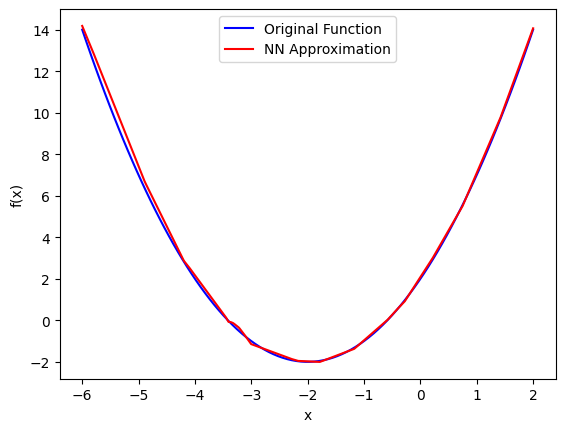

In [ ]:
# Define a deeper feedforward neural network
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Create the model
input_size = 1
hidden_size = 10
output_size = 1
model = DeepNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10000
for epoch in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(x_values.view(-1, 1))  # Reshape to (batch_size, input_size)

    # Calculate the loss
    loss = criterion(outputs, y_values.view(-1, 1))  # Reshape to (batch_size, output_size)
    if epoch % 1000 == 0 or epoch == epochs -1:
      print("At Epoch ", epoch, " the loss is: ", loss.item()) # The item() method extracts the loss value as a Python float.
    # Backpropagation and weight updates
    loss.backward()
    optimizer.step()


# Plot the original function and the approximation
plt.plot(x_values, y_values, label='Original Function', color='blue')

with torch.no_grad():
    x_test = torch.linspace(-6, 2, 500)
    predicted_values = model(x_test.view(-1, 1))
    plt.plot(x_test, predicted_values, label='NN Approximation', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

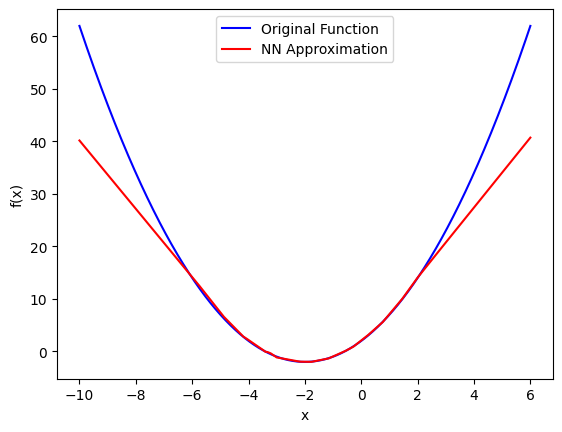

In [ ]:
# Plot the original function and the approximation out of the training distribution
x_test2 = torch.linspace(-10, 6, 1000)
y_test2 = f(x_test2)
plt.plot(x_test2, y_test2, label='Original Function', color='blue')

with torch.no_grad():
    predicted_values2 = model(x_test2.view(-1, 1))
    plt.plot(x_test2, predicted_values2, label='NN Approximation', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()